In [1]:
from sklearn.cluster import KMeans
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import math
import random

In [2]:
df= pd.read_csv('stress_detection.csv')
df.head(5)

,participant_id,day,PSS_score,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,sleep_time,wake_time,sleep_duration,PSQI_score,call_duration,num_calls,num_sms,screen_on_time,skin_conductance,accelerometer,mobility_radius,mobility_distance
0,1,1,34,2.322732,4.332193,1.185878,1.570213,3.782094,7.726792,5.190660,6.572069,1,3.924527,12,32,10.703714,3.115730,0.161717,1.145179,2.196851
1,1,2,37,1.761436,3.254120,3.907281,4.072512,1.997145,7.312674,6.170717,8.030168,4,58.318004,3,41,11.012939,0.959144,0.985587,1.021133,0.737825
2,1,3,30,3.025887,1.855002,2.045900,2.317493,3.619225,6.992060,5.318825,7.102420,1,4.941043,4,48,4.877372,3.311629,1.877445,0.478179,0.911673
3,1,4,16,1.948370,4.966676,3.345225,1.607756,3.583524,8.886914,8.061075,8.123294,3,0.295373,11,38,3.462956,0.625721,0.494921,0.630549,3.911418
4,1,5,32,3.343484,2.065936,3.137843,2.118061,2.567347,7.811705,7.312145,7.785143,3,22.300571,17,17,4.861046,0.622609,1.342600,0.254090,1.605132


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   participant_id     3000 non-null   int64  
 1   day                3000 non-null   int64  
 2   PSS_score          3000 non-null   int64  
 3   Openness           3000 non-null   float64
 4   Conscientiousness  3000 non-null   float64
 5   Extraversion       3000 non-null   float64
 6   Agreeableness      3000 non-null   float64
 7   Neuroticism        3000 non-null   float64
 8   sleep_time         3000 non-null   float64
 9   wake_time          3000 non-null   float64
 10  sleep_duration     3000 non-null   float64
 11  PSQI_score         3000 non-null   int64  
 12  call_duration      3000 non-null   float64
 13  num_calls          3000 non-null   int64  
 14  num_sms            3000 non-null   int64  
 15  screen_on_time     3000 non-null   float64
 16  skin_conductance   3000 

In [4]:
# Tiền sử lý dữ liệu
print(df.isnull().sum())

participant_id       0
day                  0
PSS_score            0
Openness             0
Conscientiousness    0
Extraversion         0
Agreeableness        0
Neuroticism          0
sleep_time           0
wake_time            0
sleep_duration       0
PSQI_score           0
call_duration        0
num_calls            0
num_sms              0
screen_on_time       0
skin_conductance     0
accelerometer        0
mobility_radius      0
mobility_distance    0
dtype: int64


In [5]:
# Chọn các cột cần chuẩn hóa
numeric_cols = ["Openness", "Conscientiousness", "Extraversion", "Agreeableness","Neuroticism"]

# Khởi tạo bộ chuẩn hóa
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[numeric_cols])

# Chuyển lại thành DataFrame với tên cột ban đầu
data_scaled_df = pd.DataFrame(data_scaled, columns=numeric_cols)
print(data_scaled_df.head())

   Openness  Conscientiousness  Extraversion  Agreeableness  Neuroticism
0 -0.602124           1.161349     -1.588557      -1.272694     0.706564
1 -1.086368           0.215936      0.791714       0.882824    -0.834270
2  0.004506          -1.011015     -0.836340      -0.628977     0.565969
3 -0.925095           1.717756      0.300112      -1.240354     0.535151
4  0.278505          -0.826036      0.118726      -0.800770    -0.342050


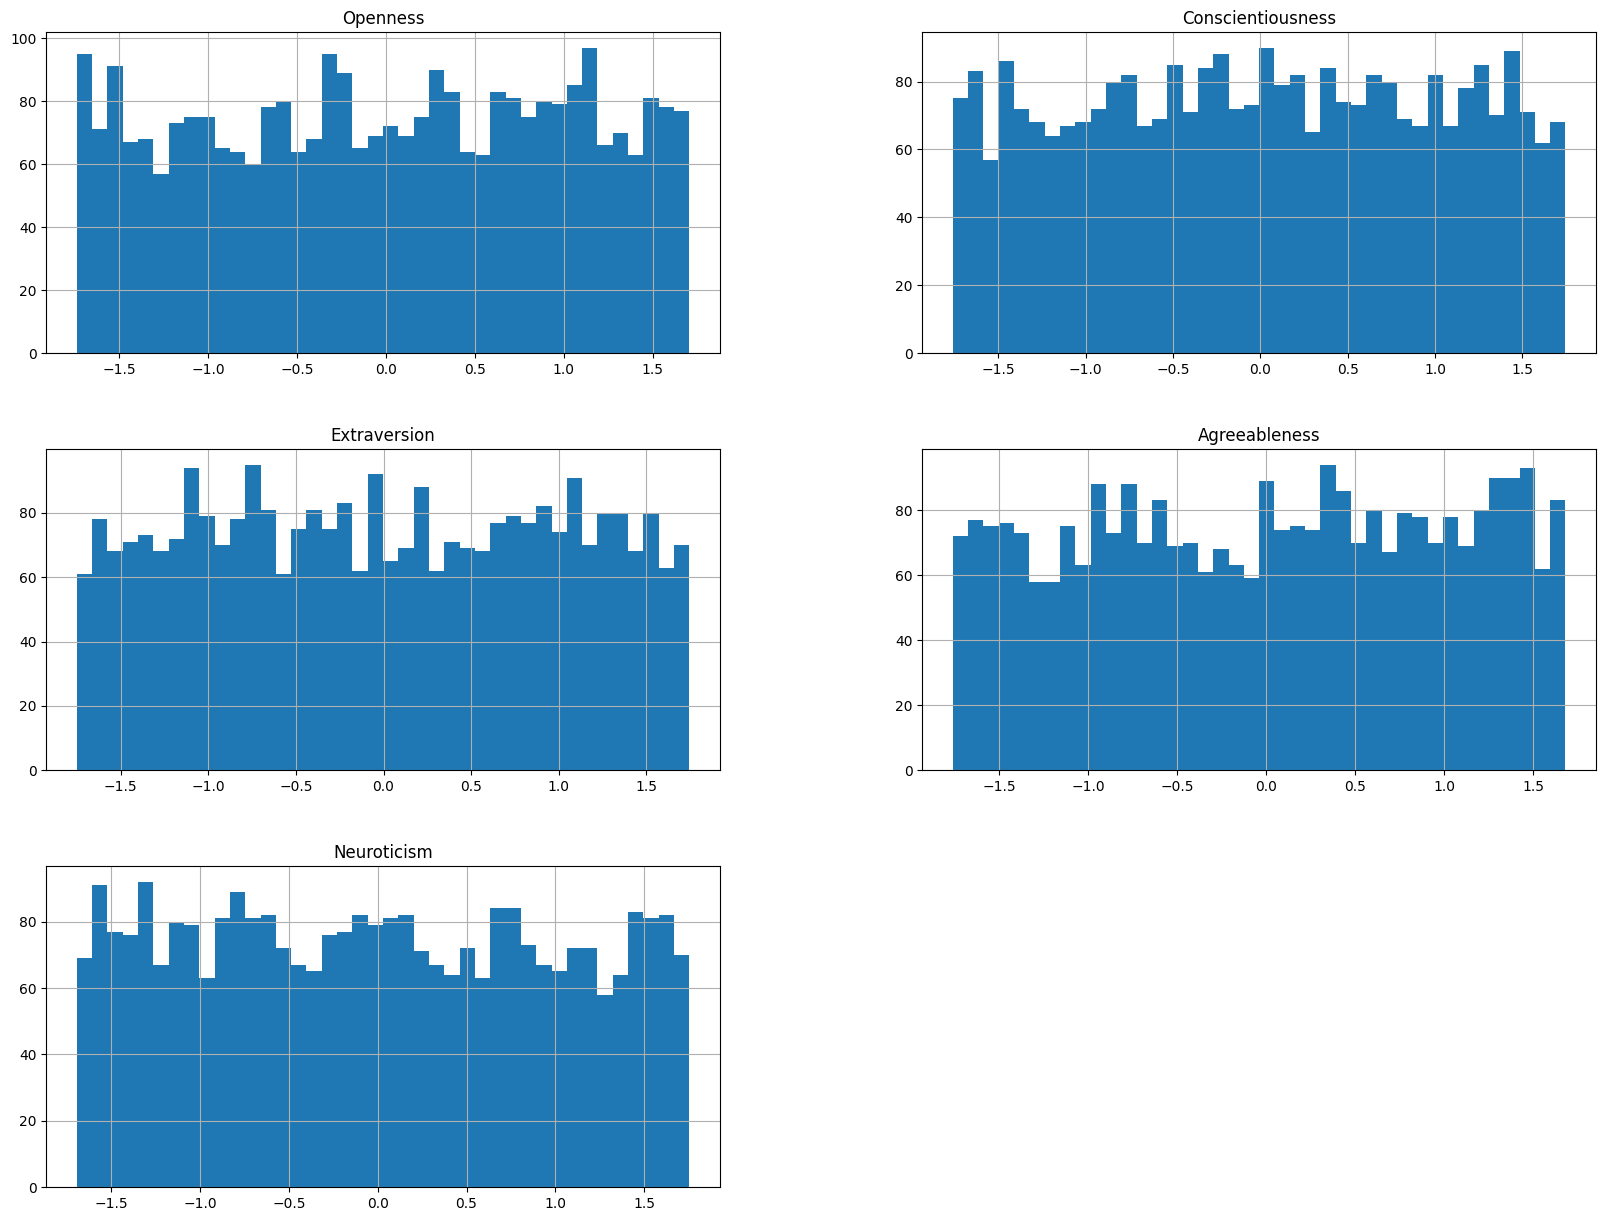

In [6]:
data_scaled_df.hist(figsize=(20,15),bins=40)
plt.show()

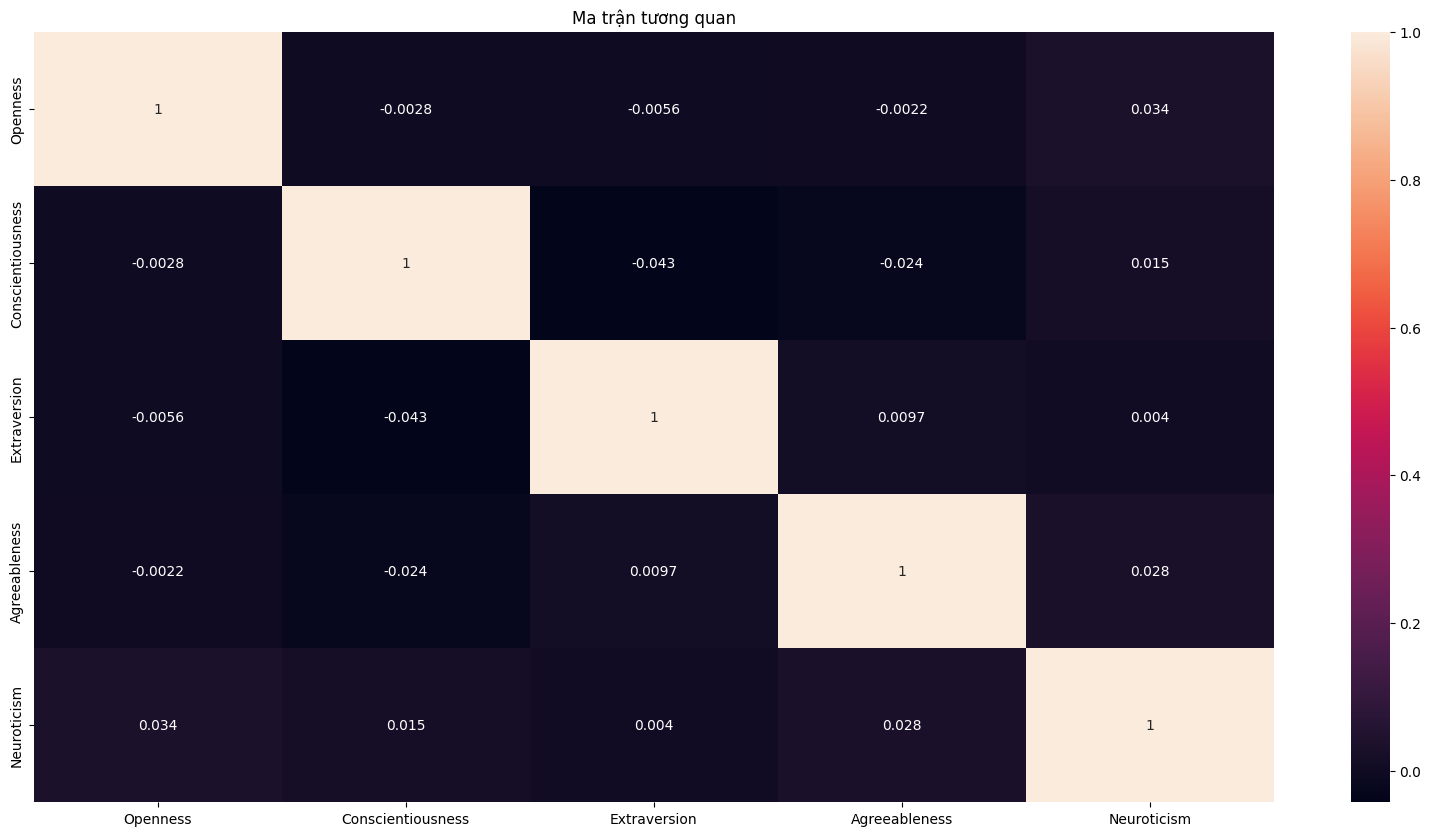

PSS_score: Điểm thang đo căng thẳng (Perceived Stress Scale) (kiểu số nguyên).
Openness: Điểm tính cách cởi mở, dễ gần (Openness) (kiểu số thực).
Conscientiousness: Điểm tính cách Cẩn thận (Conscientiousness) (kiểu số thực).
Extraversion: Điểm tính cách Hướng ngoại (Extraversion) (kiểu số thực).
Agreeableness: Điểm tính cách Thân thiện (Agreeableness) (kiểu số thực).
Neuroticism: Điểm tính cách Tâm lý bất ổn (Neuroticism) (kiểu số thực).


In [7]:
# Thể hiện ma trận tương quan
plt.figure(figsize=(20,10))
sns.heatmap(data_scaled_df.corr(),annot=True)
plt.title('Ma trận tương quan')
plt.show()
print("PSS_score: Điểm thang đo căng thẳng (Perceived Stress Scale) (kiểu số nguyên).\nOpenness: Điểm tính cách cởi mở, dễ gần (Openness) (kiểu số thực).\nConscientiousness: Điểm tính cách Cẩn thận (Conscientiousness) (kiểu số thực).\nExtraversion: Điểm tính cách Hướng ngoại (Extraversion) (kiểu số thực).\nAgreeableness: Điểm tính cách Thân thiện (Agreeableness) (kiểu số thực).\nNeuroticism: Điểm tính cách Tâm lý bất ổn (Neuroticism) (kiểu số thực).")

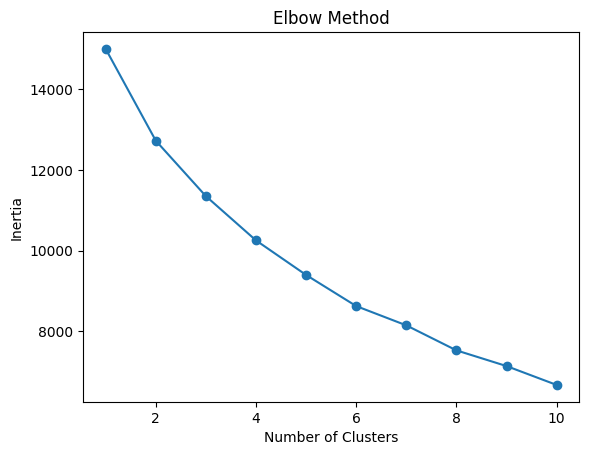

In [8]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_df)
    inertias.append(kmeans.inertia_)

# Vẽ đồ thị Elbow
plt.plot(range(1, 11), inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


In [9]:
features = df[['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism', 'sleep_duration']]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [10]:
# Tính khoảng cách Euclidean giữa hai điểm
def euclidean_distance(point1, point2):
    return math.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))


In [11]:
# Gán mỗi điểm dữ liệu vào cụm gần nhất
def assign_clusters(data, centroids):
    clusters = [[] for _ in centroids]
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        closest_centroid = distances.index(min(distances))  # Chọn tâm cụm gần nhất
        clusters[closest_centroid].append(point)
    return clusters



In [12]:
# Tính tổng sai số bình phương (SSE)
def compute_sse(clusters, centroids):
    sse = 0
    for i, cluster in enumerate(clusters):
        for point in cluster:
            sse += euclidean_distance(point, centroids[i]) ** 2
    return sse


In [13]:
# Tính tâm cụm mới
def compute_centroids(clusters):
    centroids = []
    for cluster in clusters:
        if len(cluster) > 0:
            centroid = [sum(dim) / len(cluster) for dim in zip(*cluster)]
        else:
            centroid = [0] * len(clusters[0][0])  # Tránh cụm rỗng
        centroids.append(centroid)
    return centroids

In [14]:
# Thuật toán K-means
def kmeans(data, k, max_iterations=1000, tolerance=1e-4):
    # Khởi tạo ngẫu nhiên k tâm cụm
    centroids = random.sample(data, k)
    
    for _ in range(max_iterations):
        # Gán điểm dữ liệu vào cụm gần nhất
        clusters = assign_clusters(data, centroids)
        
        # Tính lại tâm cụm
        new_centroids = compute_centroids(clusters)
        
        # Kiểm tra điều kiện hội tụ
        differences = [euclidean_distance(c, nc) for c, nc in zip(centroids, new_centroids)]
        if max(differences) < tolerance:
            break
        
        centroids = new_centroids

    return clusters, centroids

In [15]:
# Tính tổng sai số bình phương (SSE)
def compute_sse(clusters, centroids): 
    sse = 0
    for i, cluster in enumerate(clusters):
        for point in cluster:
            sse += euclidean_distance(point, centroids[i]) ** 2
    return sse

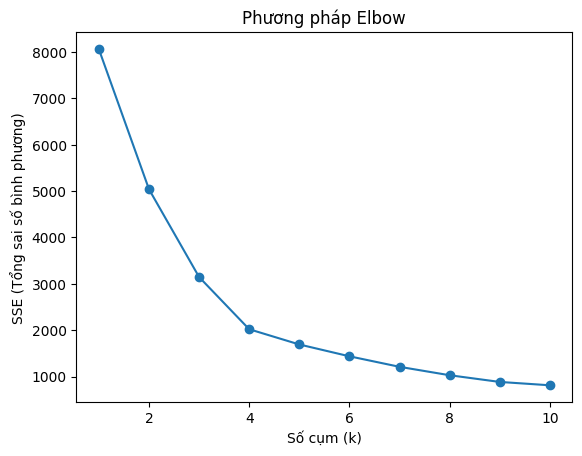

In [16]:
# Dữ liệu mẫu (sử dụng các cột 'Openness' và 'Neuroticism' từ DataFrame)
x = df['Openness']
y = df['Neuroticism']
data = list(zip(x, y))

# Phát hiện số cụm tối ưu với phương pháp Elbow
sse_values = []
k_values = range(1, 11)  # Kiểm tra từ k=1 đến k=10

for k in k_values:
    clusters, centroids = kmeans(data, k)
    sse = compute_sse(clusters, centroids)
    sse_values.append(sse)

# Vẽ đồ thị Elbow
plt.plot(k_values, sse_values, marker='o')
plt.xlabel('Số cụm (k)')
plt.ylabel('SSE (Tổng sai số bình phương)')
plt.title('Phương pháp Elbow')
plt.show()

In [17]:
k = 2
clusters, centroids = kmeans(data, k)

# Kết quả
print("Tâm cụm cuối cùng:")
for i, centroid in enumerate(centroids):
    print(f"Cụm {i + 1}: {centroid}")

print("\nCác cụm:")
for i, cluster in enumerate(clusters):
    print(f"Cụm {i + 1}: {cluster}")

Tâm cụm cuối cùng:
Cụm 1: [3.103275459748815, 3.97885940052742]
Cụm 2: [2.9405466402304663, 1.978982752986868]

Các cụm:
Cụm 1: [(2.32273211, 3.782093775), (3.025886666, 3.619224929), (1.948370376, 3.583523629), (3.319140317, 3.901543649), (2.89362267, 3.165247625), (4.604191823, 4.682931229), (1.949337735, 4.436599036), (2.073729637, 4.268664921), (4.338002412, 3.581551421), (4.710134675, 4.599415937), (1.177837744, 3.398478348), (2.994522612, 4.286137684), (3.074881569, 4.131793195), (1.501176247, 3.477270949), (4.648640796, 3.187146521), (2.145667925, 3.332207641), (4.567158526, 3.043226983), (2.174210581, 4.539842036), (3.630450471, 4.073311481), (3.17940641, 4.185409404), (4.046343151, 4.693736902), (2.654517184, 4.094354325), (2.052290849, 4.895270765), (4.525028296, 3.579712692), (2.996049525, 3.815766303), (1.128679323, 3.777092224), (3.924664477, 4.77882825), (1.216549986, 4.481433581), (1.220123585, 4.768323952), (4.101429021, 4.396640433), (1.834975348, 3.86422038), (3.77065

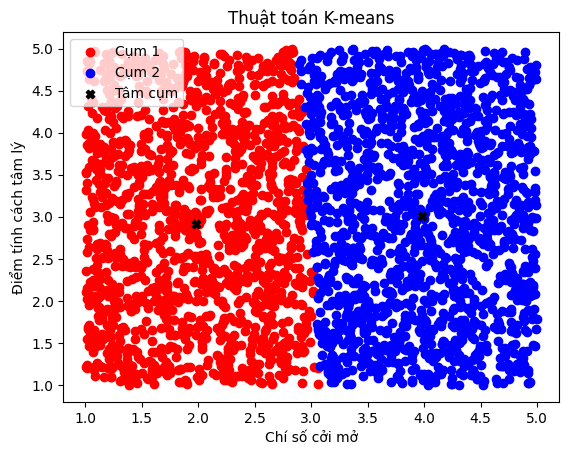

In [22]:
k_optimal = 2
clusters, centroids = kmeans(data, k_optimal)

# Vẽ biểu đồ kết quả
colors = ['r', 'b', 'g', 'y', 'c', 'm']

# Vẽ các điểm dữ liệu
for i, cluster in enumerate(clusters):
    cluster_x, cluster_y = zip(*cluster)
    plt.scatter(cluster_x, cluster_y, color=colors[i], label=f'Cụm {i + 1}')

# Vẽ các tâm cụm
centroids_x, centroids_y = zip(*centroids)
plt.scatter(centroids_x, centroids_y, color='black', marker='X', label='Tâm cụm')

# Hiển thị biểu đồ
plt.xlabel('Chí số cởi mở')
plt.ylabel('Điểm tính cách tâm lý')
plt.title('Thuật toán K-means')
plt.legend()
plt.show()

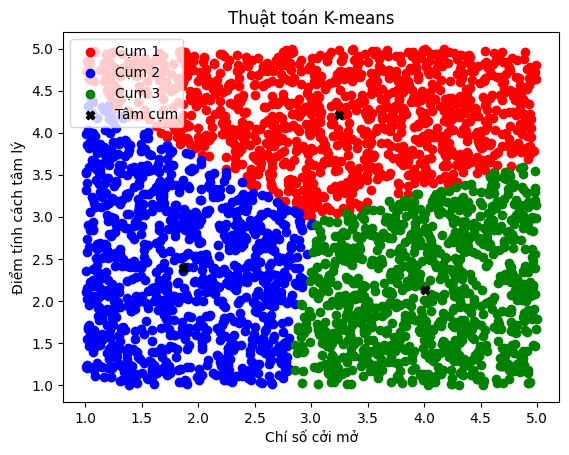

In [23]:
k_optimal = 3
clusters, centroids = kmeans(data, k_optimal)

# Vẽ biểu đồ kết quả
colors = ['r', 'b', 'g', 'y', 'c', 'm']

# Vẽ các điểm dữ liệu
for i, cluster in enumerate(clusters):
    cluster_x, cluster_y = zip(*cluster)
    plt.scatter(cluster_x, cluster_y, color=colors[i], label=f'Cụm {i + 1}')

# Vẽ các tâm cụm
centroids_x, centroids_y = zip(*centroids)
plt.scatter(centroids_x, centroids_y, color='black', marker='X', label='Tâm cụm')

# Hiển thị biểu đồ
plt.xlabel('Chí số cởi mở')
plt.ylabel('Điểm tính cách tâm lý')
plt.title('Thuật toán K-means')
plt.legend()

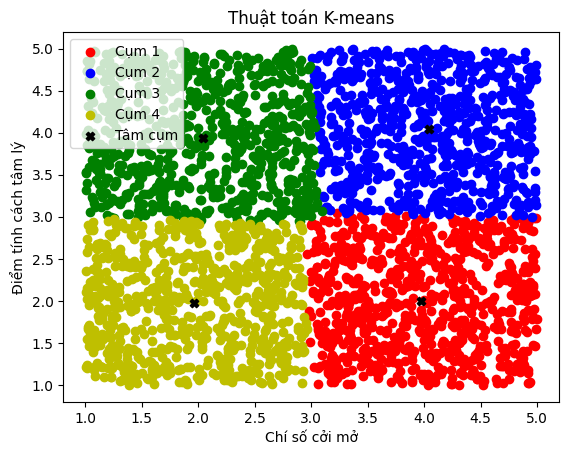

In [26]:
k_optimal = 4
clusters, centroids = kmeans(data, k_optimal)

# Vẽ biểu đồ kết quả
colors = ['r', 'b', 'g', 'y', 'c', 'm']

# Vẽ các điểm dữ liệu
for i, cluster in enumerate(clusters):
    cluster_x, cluster_y = zip(*cluster)
    plt.scatter(cluster_x, cluster_y, color=colors[i], label=f'Cụm {i + 1}')

# Vẽ các tâm cụm
centroids_x, centroids_y = zip(*centroids)
plt.scatter(centroids_x, centroids_y, color='black', marker='X', label='Tâm cụm')

# Hiển thị biểu đồ
plt.xlabel('Chí số cởi mở')
plt.ylabel('Điểm tính cách tâm lý')
plt.title('Thuật toán K-means')
plt.legend()